<a href="https://colab.research.google.com/github/esrayuzgec/AlzheimerDetection/blob/main/alzheimer_xresnet50.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 727kB 16.8MB/s 
     |████████████████████████████████| 51kB 7.6MB/s 
     |████████████████████████████████| 1.2MB 40.7MB/s 
     |████████████████████████████████| 194kB 55.5MB/s 
     |████████████████████████████████| 61kB 8.2MB/s 
     |████████████████████████████████| 51kB 7.6MB/s 
     |████████████████████████████████| 776.8MB 23kB/s 
     |████████████████████████████████| 12.8MB 246kB/s 
ERROR: torchtext 0.9.1 has requirement torch==1.8.1, but you'll have torch 1.7.1 which is incompatible.
Mounted at /content/gdrive


In [ ]:
from fastai.vision.all import *
from fastbook import *

In [ ]:
path = Path("/content/gdrive/MyDrive/Training")

In [ ]:
path.ls()

(#2) [Path('/content/gdrive/MyDrive/Training/AD'),Path('/content/gdrive/MyDrive/Training/CN')]

In [ ]:
train_fnames = get_image_files(path)

In [ ]:
braindb = DataBlock(blocks=(ImageBlock,CategoryBlock),
                  get_items= get_image_files,
                  get_y = parent_label,
                  splitter =RandomSplitter(valid_pct= 0.2, seed = 42),
                  item_tfms = item_tfms,
                  batch_tfms = batch_tfms
                  )
dls = braindb.dataloaders(path,bs=32)

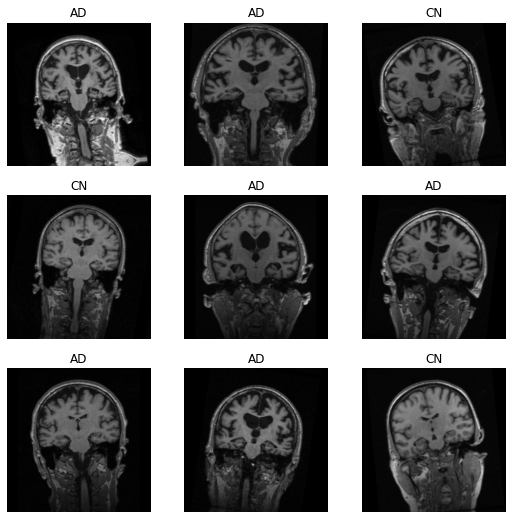

In [ ]:
dls.show_batch(max_n=9,unique=False)

In [ ]:
model = nn.Sequential(create_body(xresnet50, pretrained=True))
learn = Learner(dls, model, loss_func=CrossEntropyLossFlat(), metrics=accuracy)

In [ ]:
learn.fine_tune(50,1e-3)

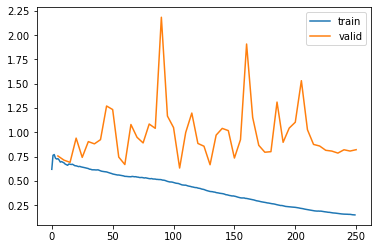

In [ ]:
learn.recorder.plot_loss()

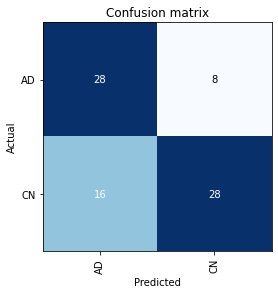

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

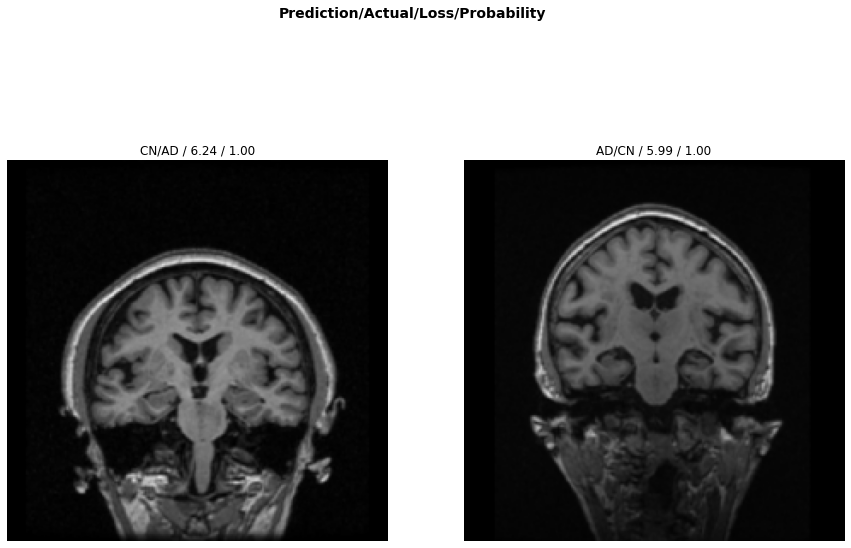

In [ ]:
interp.plot_top_losses(2, figsize=(15,10))

In [ ]:
interp.most_confused()

[('CN', 'AD', 16), ('AD', 'CN', 8)]

In [ ]:
learn.save('stage-1')

Path('models/stage-1.pth')

In [ ]:
learn.unfreeze()

SuggestedLRs(lr_min=4.78630090583465e-07, lr_steep=3.981071586167673e-06)

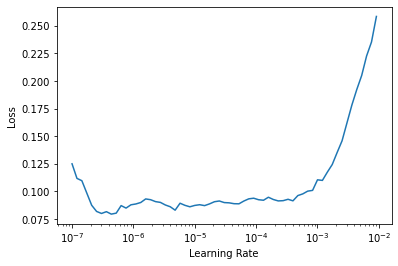

In [ ]:
learn.lr_find()

In [ ]:
learn.fit_one_cycle(15,0.1e-5)

epoch,train_loss,valid_loss,accuracy,time
0,0.100534,0.832993,0.687500,00:32
1,0.081851,0.806897,0.687500,00:31
2,0.084114,0.815589,0.687500,00:32
3,0.081911,0.793840,0.712500,00:31
4,0.085162,0.802598,0.712500,00:32
5,0.087878,0.851116,0.687500,00:32
6,0.086352,0.835792,0.687500,00:32
7,0.092769,0.848093,0.687500,00:32
8,0.089927,0.828527,0.700000,00:32
9,0.086653,0.862232,0.687500,00:31
